In [39]:
import os 
from itertools import cycle
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import comptools as comp
from submit_feature_scan import scan_features

color_dict = comp.color_dict

%matplotlib inline

In [2]:
config = 'IC86.2012'
num_groups = 2
pipeline = 'xgboost'
energybins = comp.get_energybins()
comp_list = comp.get_comp_list(num_groups=num_groups)

In [3]:
pipeline_str = '{}_comp_{}_{}-groups'.format(pipeline, config, num_groups)
pipeline_str

'xgboost_comp_IC86.2012_2-groups'

In [36]:
pattern = os.path.join(os.getcwd(),
                       'feature_scan_results',
                       '{}*'.format(pipeline_str))
files = glob.iglob(pattern)
records = [joblib.load(results_file) for results_file in files]
results = pd.DataFrame.from_records(records)

In [37]:
results

,acc_mean_heavy,acc_mean_light,acc_std_heavy,acc_std_light,best_params,config,feature_labels,features,log_energy_bins,num_groups,pipeline,pipeline_name,sklearn_version,source_code
0,"[0.6695401083730042, 0.7637845796821854, 0.824...","[0.6937751123788496, 0.6908672475929045, 0.655...","[0.043536451016342716, 0.06200040833890916, 0....","[0.028305817852188917, 0.03580184796522558, 0....","{u'classifier__learning_rate': 0.1, u'classifi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, NHits_1_6...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...
1,"[0.6336467234631546, 0.7185992832812572, 0.808...","[0.6976873687843331, 0.7053609950883558, 0.646...","[0.05625022326453249, 0.033667623845481144, 0....","[0.04355826666631039, 0.026228501769184846, 0....","{u'classifier__learning_rate': 0.05, u'classif...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, avg_inice...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/home/jbourbeau/cr-composition/feature_selecti...
2,"[0.6782010401074955, 0.7266431187669184, 0.808...","[0.736522791163993, 0.7160160418482072, 0.6810...","[0.059437781529103936, 0.03967720465760078, 0....","[0.046743986055771465, 0.04132331429875505, 0....","{u'classifier__learning_rate': 0.025, u'classi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, avg_inice...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...
3,"[0.6296290358613759, 0.7183231076427374, 0.810...","[0.7136618007798903, 0.6929570645574692, 0.638...","[0.04130153933415121, 0.03673341974085018, 0.0...","[0.041971310774815196, 0.025512106239092145, 0...","{u'classifier__learning_rate': 0.1, u'classifi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, random)","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...
4,"[0.6375920571215621, 0.727959884496624, 0.8087...","[0.6883075440365982, 0.6947304635928585, 0.635...","[0.05929054212609645, 0.038333600380875674, 0....","[0.04429854154612734, 0.022884372735402413, 0....","{u'classifier__learning_rate': 0.025, u'classi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, avg_inice...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...
5,"[0.6747489363242113, 0.7313663493450656, 0.815...","[0.7512786078735, 0.7124626134781149, 0.674009...","[0.0467170959823841, 0.04081965261638307, 0.03...","[0.04674711291852621, 0.03715037328462029, 0.0...","{u'classifier__learning_rate': 0.025, u'classi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, NChannels...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...
6,"[0.6345652913055058, 0.7221747776623075, 0.809...","[0.7074119922489708, 0.6892455064308164, 0.645...","[0.05371088802564773, 0.031900964099091246, 0....","[0.035278580189746604, 0.026198565660735057, 0...","{u'classifier__learning_rate': 0.05, u'classif...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX)","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipel

In [25]:
f = files[0]
name, ext = os.path.splitext(os.path.basename(f))
features = name.replace(pipeline_str, '').split('-')[1:]

['lap_cos_zenith',
 'log_s125',
 'log_dEdX',
 'NHits_1_60',
 'NHits_1_15',
 'NHits_15_30',
 'NHits_30_45',
 'NHits_45_60',
 'random']

9
{'classifier__learning_rate': 0.025, 'classifier__n_estimators': 600, 'classifier__max_depth': 7}
4
{'classifier__learning_rate': 0.025, 'classifier__n_estimators': 200, 'classifier__max_depth': 8}
3
{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 150, 'classifier__max_depth': 7}
8
{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 300, 'classifier__max_depth': 5}
8
{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 200, 'classifier__max_depth': 7}


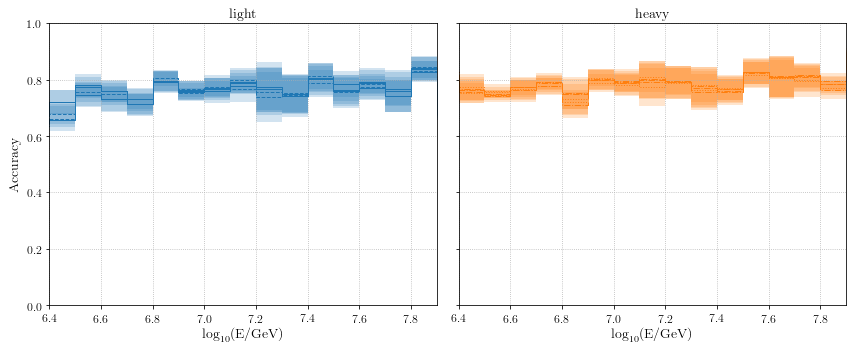

In [48]:
cwd = os.getcwd()
linestyles = cycle(['-', '-.', '--', ':'])
fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
for idx_row, row in results.iterrows():
    if 'random' in row['features']:
        continue
    
    print(len(row['features']))
    print(row['best_params'])
    
    for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
        labels = row['feature_labels']
        formatted_labels = [] 
        nchannels_flag = False
        for label in labels:
            if 'NChannels' in label:
                if not nchannels_flag:
                    formatted_labels.append('\{NChannels\}')
                    nchannels_flag = True
                else:
                    continue
            else:
                formatted_labels.append(label)
        # Add to plot
        comp.plot_steps(energybins.log_energy_bins,
                        row['acc_mean_{}'.format(composition)],
                        yerr=row['acc_std_{}'.format(composition)],
                        color=color_dict[composition],
                        ls=next(linestyles),
                        label='\n '.join(formatted_labels),
                        ax=ax)

        ax.set_xlim(6.4, 7.9)
        ax.set_ylim(0, 1)
        ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
        if idx == 0:
            ax.set_ylabel('Accuracy')
        ax.set_title(composition)
        ax.grid(lw=0.8)
#         if idx == len(comp_list) - 1:
# #             ax.legend(title='Training features', fontsize=10)
#             ax.legend(title='Training features', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    
# ax.legend(title='Training features', loc='lower left', fontsize=10)
outfile = os.path.join(comp.paths.figures_dir, 
                       'model_evaluation',
                       'new_features',
                       '{}_num_groups-{}.png'.format(config, num_groups))
# comp.check_output_dir(outfile)
# plt.savefig(outfile)
plt.show()

In [49]:
# cwd = os.getcwd()
# linestyles = ['-', '-.', '--']
# fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
# for features, ls in zip(scan_features, linestyles):
#     features_str = '-'.join(features)
#     results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
#     results_file = os.path.join(cwd,
#                                 'feature_scan_results',
#                                 results_basename)
#     results = joblib.load(results_file)
#     print(results['best_params'])

#     for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
#         labels = results['feature_labels']
#         formatted_labels = [] 
#         nchannels_flag = False
#         for label in labels:
#             if 'NChannels' in label:
#                 if not nchannels_flag:
#                     formatted_labels.append('\{NChannels\}')
#                     nchannels_flag = True
#                 else:
#                     continue
#             else:
#                 formatted_labels.append(label)
#         # Add to plot
#         comp.plot_steps(energybins.log_energy_bins,
#                         results['acc_mean_{}'.format(composition)],
#                         yerr=results['acc_std_{}'.format(composition)],
#                         color=color_dict[composition],
#                         ls=ls,
# #                         label=', '.join(results['feature_labels']),
#                         label='\n '.join(formatted_labels),
#                         ax=ax)

#         ax.set_xlim(6.4, 7.9)
#         ax.set_ylim(0, 1)
#         ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
#         if idx == 0:
#             ax.set_ylabel('Accuracy')
#         ax.set_title(composition)
#         ax.grid(lw=0.8)
# #         if idx == len(comp_list) - 1:
# # #             ax.legend(title='Training features', fontsize=10)
# #             ax.legend(title='Training features', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
# # ax.legend(title='Training features', loc='lower left', fontsize=10)
# outfile = os.path.join(comp.paths.figures_dir, 
#                        'model_evaluation',
#                        'new_features',
#                        '{}_num_groups-{}.png'.format(config, num_groups))
# comp.check_output_dir(outfile)
# plt.savefig(outfile)
# plt.show()

In [4]:
def plot_feature_importances(feature_importances, feature_labels):
    num_features = len(feature_labels)
    importances = feature_importances
    indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots()
    for f in range(num_features):
        print('{}) {}'.format(f + 1, importances[indices[f]]))

    plt.ylabel('Feature Importances')
    plt.bar(range(num_features),
            importances[indices],
            align='center')

    plt.xticks(range(num_features),
               feature_labels[indices],
               rotation=90)
    plt.xlim([-1, num_features])
    # plt.ylim([0, .40])
    ax.grid(axis='y')
    plt.show()

1) 0.210891738534
2) 0.154697328806
3) 0.14927315712
4) 0.114992402494
5) 0.11282274127
6) 0.082013450563
7) 0.059882838279
8) 0.0585810355842
9) 0.0568453036249


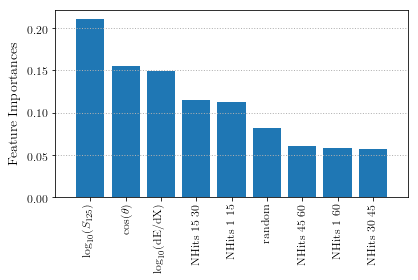

1) 0.25014770031
2) 0.23667730391
3) 0.232777968049
4) 0.168616324663
5) 0.111780695617


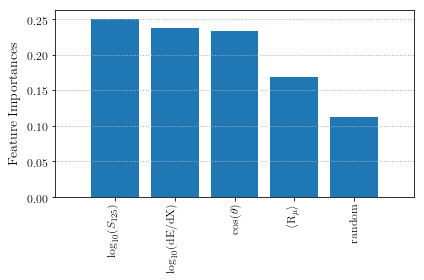

1) 0.195756226778
2) 0.169726133347
3) 0.156970143318
4) 0.126868993044
5) 0.0905008614063
6) 0.0838144570589
7) 0.0641993582249
8) 0.0574636086822
9) 0.0547002218664


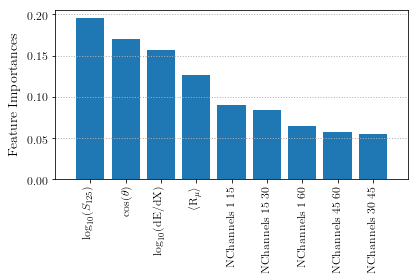

1) 0.322253763676
2) 0.309687882662
3) 0.248479932547
4) 0.119578436017


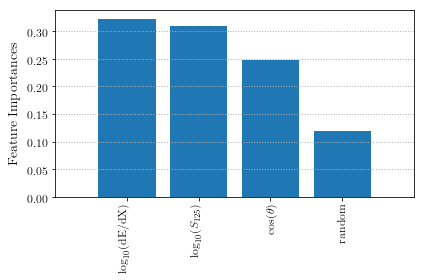

1) 0.275448918343
2) 0.25782096386
3) 0.246561408043
4) 0.220168724656


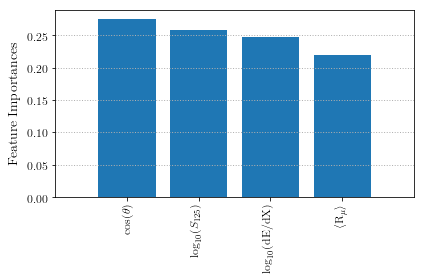

1) 0.199444010854
2) 0.17157676816
3) 0.159033119678
4) 0.105705663562
5) 0.102010376751
6) 0.0873987153172
7) 0.0659050047398
8) 0.0554293654859
9) 0.0534969642758


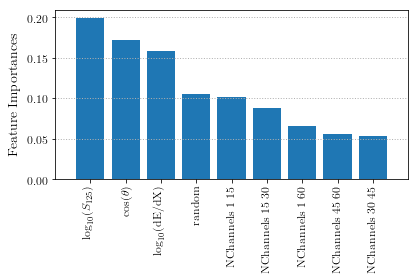

1) 0.366678625345
2) 0.318051308393
3) 0.315270066261


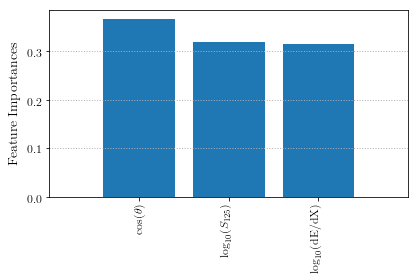

1) 0.240847781301
2) 0.170001477003
3) 0.162442564964
4) 0.127167627215
5) 0.113680154085
6) 0.0663998797536
7) 0.0647695288062
8) 0.0546909719706


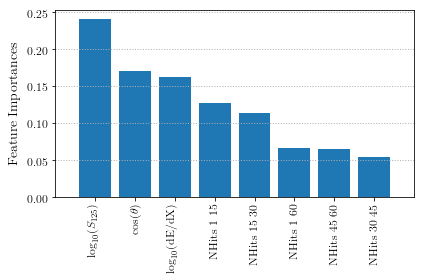

1) 0.223457634449
2) 0.198305085301
3) 0.177898302674
4) 0.107661016285
5) 0.0953898280859
6) 0.0765423700213
7) 0.0637288168073
8) 0.0570169501007


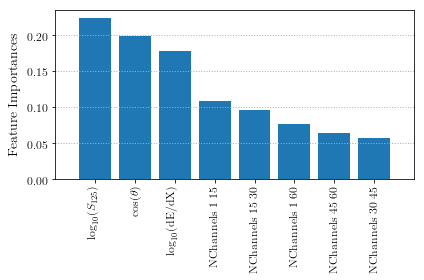

In [41]:
# for features in scan_features:
for idx, row in results.iterrows():

#     features_str = '-'.join(features)
#     results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
#     results_file = os.path.join(cwd,
#                                 'feature_scan_results',
#                                 results_basename)
#     results = joblib.load(results_file)

    importances = row['pipeline'].named_steps['classifier'].feature_importances_
    feature_labels = np.array(row['feature_labels'])
    plot_feature_importances(importances, feature_labels)

1) 0.195756226778
2) 0.169726133347
3) 0.156970143318
4) 0.126868993044
5) 0.0905008614063
6) 0.0838144570589
7) 0.0641993582249
8) 0.0574636086822
9) 0.0547002218664


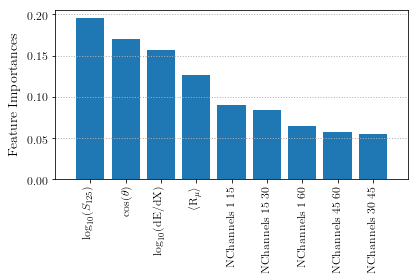

In [27]:
feature_labels = np.array(results['feature_labels'])
num_features = len(feature_labels)
importances = results['pipeline'].named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots()
for f in range(num_features):
    print('{}) {}'.format(f + 1, importances[indices[f]]))

plt.ylabel('Feature Importances')
plt.bar(range(num_features),
        importances[indices],
        align='center')

plt.xticks(range(num_features),
           feature_labels[indices],
           rotation=90)
plt.xlim([-1, num_features])
# plt.ylim([0, .40])
ax.grid(axis='y')
plt.show()

In [11]:
clf = results['pipeline'].named_steps['classifier'].feature_importances_
clf.feature_importances_

array([0.16972613, 0.19575623, 0.15697014, 0.126869  , 0.06419936,
       0.09050086, 0.08381446, 0.05470022, 0.05746361], dtype=float32)

In [12]:
clf.classes_

array([0, 1])

In [14]:
clf.__dict__

{'_Booster': <xgboost.core.Booster at 0x7f1f55b67650>,
 '_features_count': 9,
 '_le': LabelEncoder(),
 'base_score': 0.5,
 'booster': 'gbtree',
 'classes_': array([0, 1]),
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'kwargs': {},
 'learning_rate': 0.025,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': nan,
 'n_classes_': 2,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}